In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

### Build the dataset with the four test from the field trial data

In [3]:
df = pd.DataFrame()
for test in range(1, 5):
    file = f"simulations_data/field_trial/PD{test}/error.csv"
    temp_data = pd.read_csv(file)
    temp_data = temp_data.rename(columns={
        "%time": f"{test}_time_percent",
        "field.errorX": f"{test}_error_X",
        "field.errorY": f"{test}_error_Y",
        "field.errorT": f"{test}_error_Angle"
    })
    temp_data = temp_data.drop(columns=["field.errorS"])
    df = pd.concat([df, temp_data], axis=1)
df

,1_time_percent,1_error_X,1_error_Y,1_error_Angle,2_time_percent,2_error_X,2_error_Y,2_error_Angle,3_time_percent,3_error_X,3_error_Y,3_error_Angle,4_time_percent,4_error_X,4_error_Y,4_error_Angle
0,1.543938e+18,4.942871,-56.445465,-2.486097,1.543938e+18,91.858803,16.420502,-11.563489,1544027854183512275,-31.264816,27.157257,61.801048,1.544029e+18,10.439545,43.220757,-38.072502
1,1.543938e+18,4.887939,-53.411148,-2.941867,1.543938e+18,93.161362,16.540627,-12.703962,1544027854341803847,-31.185593,28.383720,64.126656,1.544029e+18,9.300949,42.636238,-38.357113
2,1.543938e+18,4.833023,-50.376816,-3.397637,1.543938e+18,101.770676,11.776344,1.088464,1544027854481463121,-31.106369,29.610176,66.452271,1.544029e+18,8.162354,42.051720,-38.641727
3,1.543938e+18,4.778107,-47.342484,-3.853407,1.543938e+18,103.947960,5.729179,4.272192,1544027854614227910,-26.731735,34.289551,62.391285,1.544029e+18,7.023743,41.467201,-38.926338
4,1.543938e+18,4.723175,-44.308151,-4.309177,1.543938e+18,106.848579,1.914032,5.937141,1544027854706912058,-25.226288,36.662506,63.794121,1.544029e+18,5.885147,40.882683,-39.210949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1544027906633220550,-3.531494,20.884346,-11.944840,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1544027906634597197,-4.247650,15.212509,-15.821715,NaN,NaN,NaN,NaN
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1544027906741150067,-3.822601,15.625458,-18.881659,NaN,NaN,NaN,NaN
375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1544027906833165996,-1.548630,20.493965,-11.835084,NaN,NaN,NaN,NaN


In [4]:
df.to_csv("./data/controller_error_field_trial.csv", index=False)

### Controllers errors dataset of the field trial

In [5]:
error_file = "./data/controller_error_field_trial.csv"
data = pd.read_csv(error_file)

In [6]:
controller_times = {}

with open("./data/controller_time_trial_PD.csv", "r") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    next(csv_reader)
    for row in csv_reader:
        controller_times[row[0]] = float(row[1])

print(controller_times)

{'1': 39.585, '2': 31.651, '3': 63.554, '4': 33.267}


In [7]:
for test, test_time in controller_times.items():    

    first_val_tstamp = data[test+"_time_percent"][0]
    last_val_tstamp = data[test+"_time_percent"][data.apply(lambda column: column.dropna().index[-1])[test+"_time_percent"]]
    
    m = test_time / (last_val_tstamp - first_val_tstamp)
    b = test_time - m * last_val_tstamp
    
    data[test+"_time"] = m * data[test+"_time_percent"] + b

data = data.reindex(columns=sorted(data.columns))

In [8]:
data

,1_error_Angle,1_error_X,1_error_Y,1_time,1_time_percent,2_error_Angle,2_error_X,2_error_Y,2_time,2_time_percent,3_error_Angle,3_error_X,3_error_Y,3_time,3_time_percent,4_error_Angle,4_error_X,4_error_Y,4_time,4_time_percent
0,-2.486097,4.942871,-56.445465,0.000000,1.543938e+18,-11.563489,91.858803,16.420502,0.000000,1.543938e+18,61.801048,-31.264816,27.157257,0.000000,1544027854183512275,-38.072502,10.439545,43.220757,-2.384186e-07,1.544029e+18
1,-2.941867,4.887939,-53.411148,0.235308,1.543938e+18,-12.703962,93.161362,16.540627,0.239115,1.543938e+18,64.126656,-31.185593,28.383720,0.191005,1544027854341803847,-38.357113,9.300949,42.636238,1.241317e-01,1.544029e+18
2,-3.397637,4.833023,-50.376816,0.487947,1.543938e+18,1.088464,101.770676,11.776344,0.481935,1.543938e+18,66.452271,-31.106369,29.610176,0.359528,1544027854481463121,-38.641727,8.162354,42.051720,2.260127e-01,1.544029e+18
3,-3.853407,4.778107,-47.342484,1.164477,1.543938e+18,4.272192,103.947960,5.729179,0.707791,1.543938e+18,62.391285,-26.731735,34.289551,0.519731,1544027854614227910,-38.926338,7.023743,41.467201,2.976704e-01,1.544029e+18
4,-4.309177,4.723175,-44.308151,1.359524,1.543938e+18,5.937141,106.848579,1.914032,0.871871,1.543938e+18,63.794121,-25.226288,36.662506,0.631570,1544027854706912058,-39.210949,5.885147,40.882683,4.340446e-01,1.544029e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.944840,-3.531494,20.884346,63.289381,1544027906633220550,NaN,NaN,NaN,NaN,NaN
373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-15.821715,-4.247650,15.212509,63.291042,1544027906634597197,NaN,NaN,NaN,NaN,NaN
374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-18.881659,-3.822601,15.625458,63.419616,1544027906741150067,NaN,NaN,NaN,NaN,NaN
375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.835084,-1.548630,20.493965,63.530648,1544027906833165996,NaN,NaN,NaN,NaN,NaN


In [14]:
pd_mean_df = pd.DataFrame()
pd_mean_df["Time"] = data["3_time"]
pd_mean_df["Error_X"] = data.loc[:, ["1_error_X", "2_error_X", "3_error_X", "4_error_X"]].mean(axis=1)
pd_mean_df["Error_Y"] = data.loc[:, ["1_error_Y", "2_error_Y", "3_error_Y", "4_error_Y"]].mean(axis=1)
pd_mean_df["Error_Angle"] = data.loc[:, ["1_error_Angle", "2_error_Angle", "3_error_Angle", "4_error_Angle"]].mean(axis=1)

In [15]:
pd_mean_df

,Time,Error_X,Error_Y,Error_Angle
0,0.000000,18.994101,7.588263,2.419740
1,0.191005,19.041164,8.537359,2.530928
2,0.359528,20.914921,8.265356,6.375343
3,0.519731,22.254519,8.535862,5.970933
4,0.631570,23.057653,8.787767,6.552784
...,...,...,...,...
372,63.289381,-3.531494,20.884346,-11.944840
373,63.291042,-4.247650,15.212509,-15.821715
374,63.419616,-3.822601,15.625458,-18.881659
375,63.530648,-1.548630,20.493965,-11.835084


Text(0.5, 0.98, 'Controller Errors with Low Illumination and Wind Disturbances')

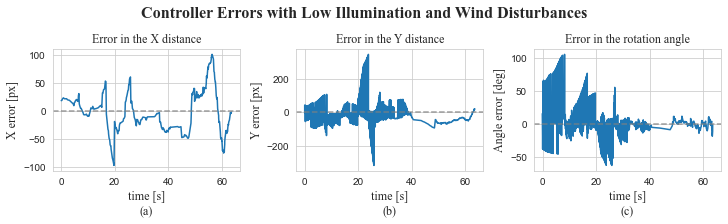

In [16]:
timesfont = {'fontname':'Times New Roman'}

sns.set_style('whitegrid')

fig = plt.figure(constrained_layout=True, figsize=(10,3))

gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])

x = sns.lineplot(data=pd_mean_df, x="Time", y="Error_X",
                 ax=ax1)
y = sns.lineplot(data=controllers, x="Time", y="Error_Y",
                 ax=ax2)
angle = sns.lineplot(data=controllers, x="Time", y="Error_Angle",
                     ax=ax3)

x.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
y.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)
angle.axhline(y=0, linewidth=1.5, color='grey', ls='--', alpha=0.75)


x.set_title("Error in the X distance", fontsize=12, **timesfont)
y.set_title("Error in the Y distance", fontsize=12, **timesfont)
angle.set_title("Error in the rotation angle", fontsize=12, **timesfont)

x.set_xlabel("time [s]\n(a)", fontsize=12, **timesfont)
y.set_xlabel("time [s]\n(b)", fontsize=12, **timesfont)
angle.set_xlabel("time [s]\n(c)", fontsize=12, **timesfont)

x.set_ylabel("X error [px]", fontsize=12, **timesfont)
y.set_ylabel("Y error [px]", fontsize=12, **timesfont)
angle.set_ylabel("Angle error [deg]", fontsize=12, **timesfont)


fig.suptitle('Controller Errors with Low Illumination and Wind Disturbances', fontsize=16, fontweight='bold', **timesfont)

In [19]:
estimators = pd.DataFrame(columns=["std_X", "MSE_X", "RMSE_X",
                                   "std_Y", "MSE_Y", "RMSE_Y",
                                   "std_angle", "MSE_angle", "RMSE_angle"],
                          index=["PD"])

estimators["MSE_X"]["PD"] = (pd_mean_df["Error_X"] ** 2).mean()
estimators["MSE_Y"]["PD"] = (pd_mean_df["Error_Y"] ** 2).mean()
estimators["MSE_angle"]["PD"] = (pd_mean_df["Error_Angle"] ** 2).mean()

estimators["std_X"]["PD"] = (pd_mean_df["Error_X"]).std()
estimators["std_Y"]["PD"] = (pd_mean_df["Error_Y"]).std()
estimators["std_angle"]["PD"] = (pd_mean_df["Error_Angle"]).std()

estimators[["RMSE_X", "RMSE_Y", "RMSE_angle"]] = estimators[["MSE_X", "MSE_Y", "MSE_angle"]] ** 0.5

estimators

,std_X,MSE_X,RMSE_X,std_Y,MSE_Y,RMSE_Y,std_angle,MSE_angle,RMSE_angle
PD,39.758287,1579.741004,39.745956,31.563207,1325.764963,36.411056,8.772367,77.019389,8.776069
